In [2]:
# Loading-in our data!
import torchvision


# downloading 50k image net samples.
data = torchvision.datasets.Imagenette(
    root = "imagenette_download",
    split = "train",
    download=False
)

In [3]:
# using our extractor.
from dataloader import raw_images_convert
from dataloader import save_raw_labels

# saving all of our labels and images so
# they are acessible by model
raw_images_convert(data,'raw_images','jpeg') 
save_raw_labels(data,"label_folder","all")

# now, we can delete the real images, but keep for now.

Path exists, process skipped
labels.csv already created, skipping


'Yay!'

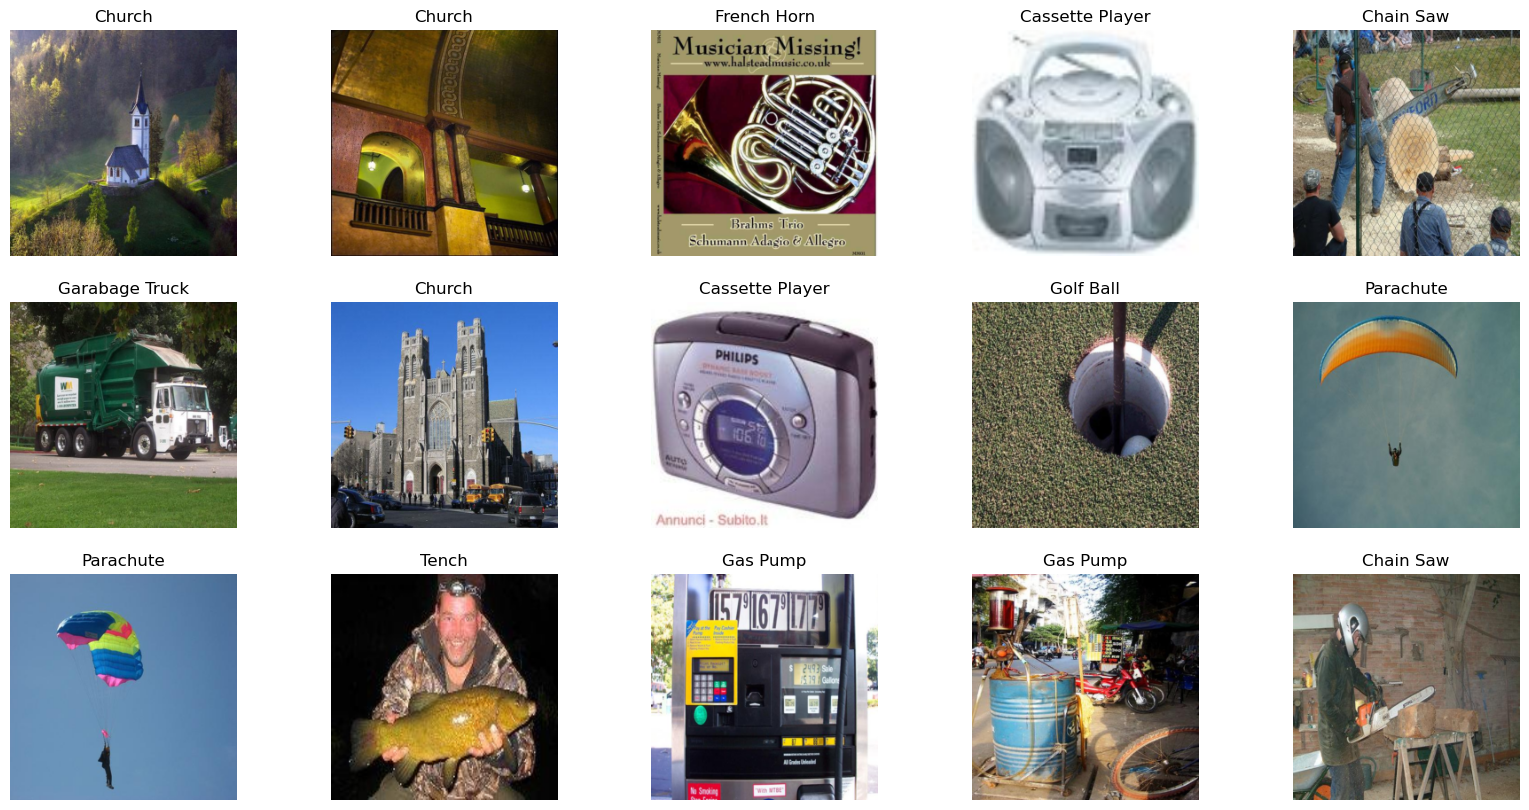

In [4]:
# making sure everything worked: saving into custom-dataset
from dataloader import ImageDataset
import matplotlib.pyplot as plt
import torch 
label_map = {
    0:"Tench",
    1:"English Springer",
    2: "Cassette Player",
    3:"Chain Saw",
    4:"Church",
    5:"French Horn",
    6:"Garabage Truck",
    7:"Gas Pump",
    8:"Golf Ball",
    9:"Parachute"
}

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256,256]),
    torchvision.transforms.ToTensor()
])
custom_data = ImageDataset(transform,'raw_images',"label_folder","jpeg",False,None)

fig, axes = plt.subplots(3,5)
fig.set_size_inches(20,10)
for i in range(15):
    ind = torch.randint(0,len(custom_data),size=(1,)).item()
    axes[i // 5][i%5].imshow(custom_data[ind][0].permute(1,2,0))
    axes[i // 5][i%5].set_title(label_map[custom_data[ind][1]])
    axes[i // 5][i%5].set_axis_off()


'Yay!'

## Using VAE to store latent representations

In [5]:
# creating paths
import os
import sys
sys.path.append(os.path.abspath('../VAE'))

In [6]:
# now, we need to create our latent-model
from get_vae import get_vae
from make_latents import store_latents

vae = get_vae()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12532978..1.0183982].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13814738..1.0452574].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.015776513..1.0152235].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11215002..1.0373291].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21196805..1.1090709].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19551708..1.0146666].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0

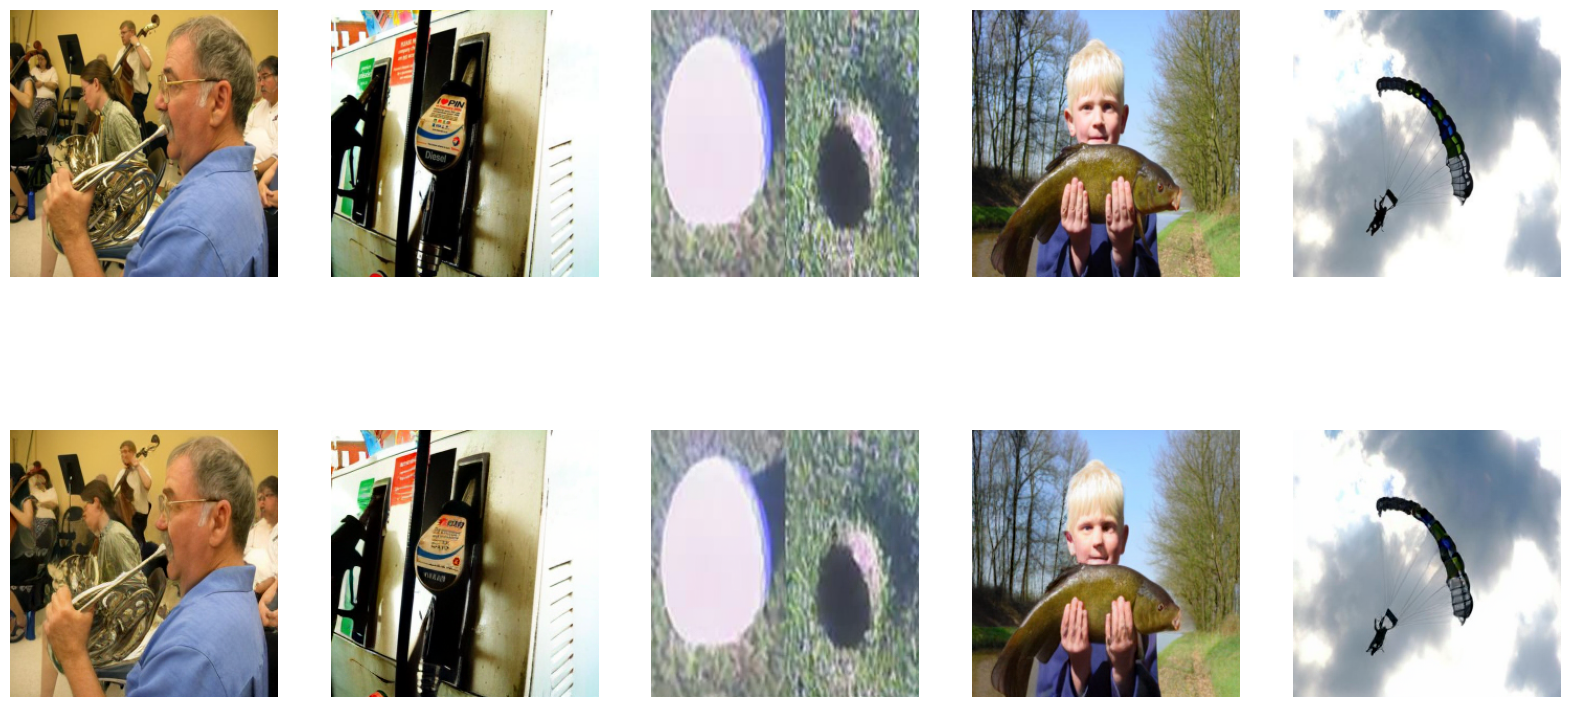

In [7]:

fig, axes = plt.subplots(2,5)
fig.set_size_inches(20,10)
for i in range(10):
    ind = torch.randint(0,len(custom_data),size=(1,)).item()
    axes[0][i%5].imshow(custom_data[ind][0].permute(1,2,0))
    
    # model
    model_out = vae(custom_data[ind][0].unsqueeze(0))[0].squeeze()
    model_out = model_out.detach()
    axes[1][i%5].imshow(model_out.permute(1,2,0))
    
    axes[0][i%5].axis('off')
    axes[1][i%5].axis('off')
    

In [ ]:
# storing our latent-variables
from make_latents import store_latents

  0%|          | 0/9469 [00:00<?, ?it/s]c:\Users\charl\miniconda3\envs\manimtest\Lib\site-packages\diffusers\models\attention_processor.py:2358: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  hidden_states = F.scaled_dot_product_attention(
  0%|          | 10/9469 [00:33<8:49:24,  3.36s/it] 


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 22.29 GiB is allocated by PyTorch, and 149.35 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)